In [1]:
%reset -f
import pandas as pd
import numpy as np
from wavhandler import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
sns.set()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
data = Dataset('LG')
data.read(data="all", setting='psd_dB', labels='text') # data.target_classes[1]

Data: all.
Read 12746 filenames in 0.07 seconds.
Loaded data into matrix in 57.90 seconds.


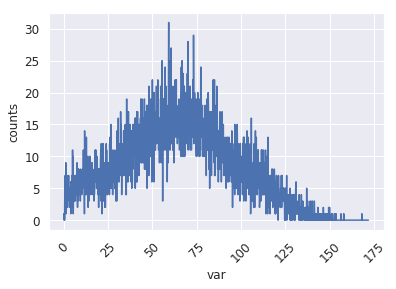

In [3]:
data.clean(threshold=20)

In [4]:
# data.y.name = 'labels'
# from pandas.plotting import radviz
# plt.figure(figsize=(20,14))
# tmp = pd.concat([data.X, data.y],axis=1)

# radviz(tmp, 'labels')

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)
lr.fit(data.X, data.y)
cross_val_score(lr, data.X, data.y, cv=3)

array([0.96054667, 0.95794634, 0.95717234])

### Trying PCA

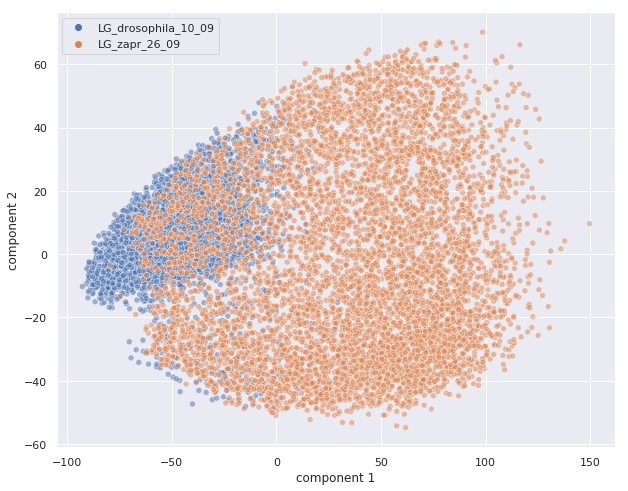

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X_std = StandardScaler(with_std=False).fit_transform(data.X)  # standardization of data

rbf_pca = PCA(n_components=2)

X_final = rbf_pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.5, legend='full', hue=data.y) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [7]:
lr = LogisticRegression(solver='lbfgs', n_jobs=-1)
lr.fit(X_final, data.y)
cross_val_score(lr, X_final, data.y, cv=3)

array([0.89633832, 0.89860681, 0.88106295])

### Trying Kernel PCA 

The kernel trick is a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinea classification and regression for Support Vector Machines.
A linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space. 
Applying the Kernel trick to PCA, making it possile to perform complex nonlinear projections for dimensionality reduction. It is often good at preserving clusters of instances after projections, or sometimes even unrolling datasets that lie close to a twisted manifold.

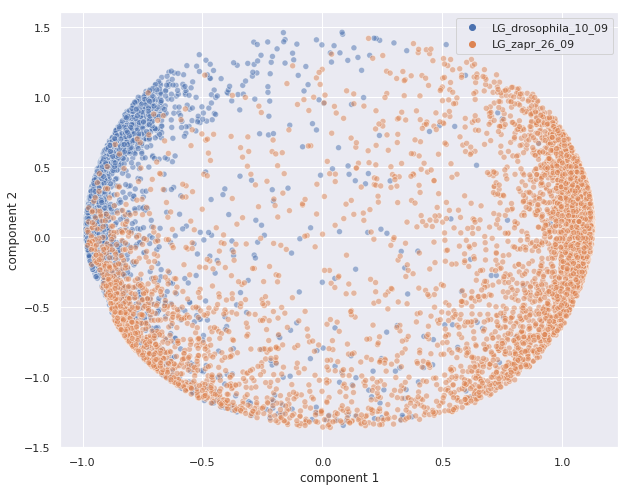

In [8]:
from sklearn.decomposition import KernelPCA

X_std = StandardScaler(with_std=False).fit_transform(data.X)  # standardization of data

rbf_pca = KernelPCA(n_components=2, kernel="sigmoid")

X_final = rbf_pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.5, legend='full', hue=data.y) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [9]:
lr = LogisticRegression(solver='lbfgs', n_jobs=-1)
lr.fit(X_final, data.y)
cross_val_score(lr, X_final, data.y, cv=3)

array([0.92186694, 0.92750258, 0.90712074])

### Trying LLE (Locally Linear Embedding)

LLE does not rely on projections like the previous algorithms. In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. This makes it particularly good at unrolling twisted manifolds, especially when there is too much noise.

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

In [11]:
X_std = StandardScaler(with_std=False).fit_transform(data.X)  # standardization of data

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=50)
X_final = lle.fit_transform(X_std)

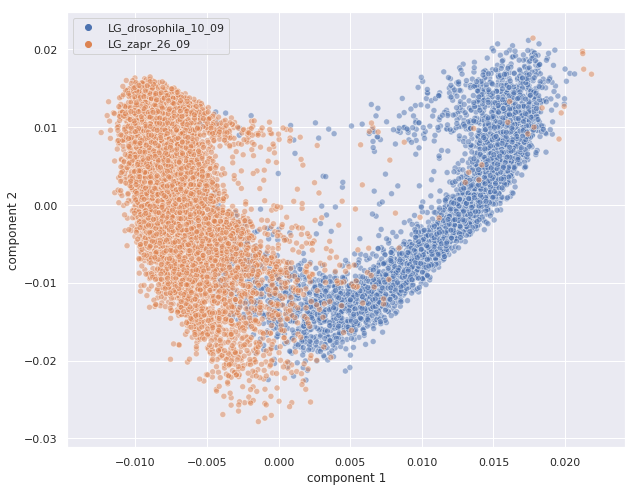

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.5, legend='full', hue=data.y) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [13]:
lr = LogisticRegression(solver='lbfgs', n_jobs=-1)
lr.fit(X_final, data.y)
cross_val_score(lr, X_final, data.y, cv=3)

array([0.73671996, 0.7120743 , 0.74406605])

### Trying t-SNE

In [14]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [15]:
n_components = 2
learning_rate = 300
perplexity = 50
early_exaggeration = 12
init='random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
           perplexity=perplexity, early_exaggeration=early_exaggeration, \
           init=init, random_state=random_state)

In [16]:
X_std = StandardScaler(with_std=True).fit_transform(data.X)  # standardization of data

X_final = tSNE.fit_transform(X_std)

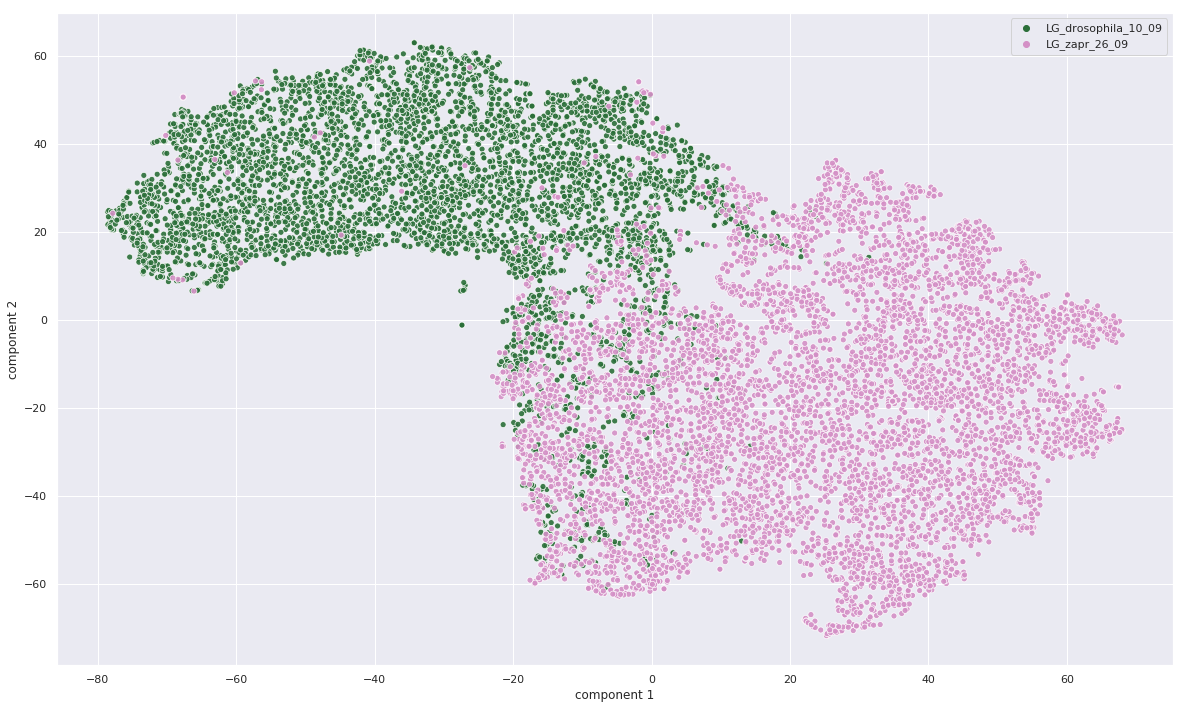

In [17]:
plt.figure(figsize=(20,12))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.9, legend='full', hue=data.y, palette=sns.color_palette("cubehelix", 2)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [18]:
lr = LogisticRegression(solver='lbfgs', n_jobs=-1)
lr.fit(X_final, data.y)
cross_val_score(lr, X_final, data.y, cv=3)

array([0.93037648, 0.93498452, 0.9246646 ])

# **Using more fly data**

In [117]:
data1 = Dataset('Leafminers')
data1.read(data=data1.target_classes[0], setting='psd_dB', labels='text')

data2 = Dataset('Leafminers')
data2.read(data=data2.target_classes[1], setting='psd_dB', labels='text')
data2.y = data2.y.apply(lambda x: x+'_')

data3 = Dataset('Thomas')
data3.read(data=data3.target_classes[1], setting='psd_dB', labels='text')

data4 = Dataset('LG')
data4.read(data=data4.target_classes[1], setting='psd_dB', labels='text')

data5 = Dataset('Thomas')
data5.read(data=data5.target_classes[0], setting='psd_dB', labels='text')

Data: Cichorii.
Read 1451 filenames in 0.05 seconds.
Loaded data into matrix in 0.55 seconds.
Data: Cichorii_v2.
Read 4104 filenames in 0.04 seconds.
Loaded data into matrix in 1.26 seconds.
Data: Suzukii.
Read 13619 filenames in 0.13 seconds.
Loaded data into matrix in 4.02 seconds.
Data: LG_zapr_26_09.
Read 7210 filenames in 0.09 seconds.
Loaded data into matrix in 2.36 seconds.
Data: Melanogaster.
Read 6811 filenames in 0.14 seconds.
Loaded data into matrix in 1.83 seconds.


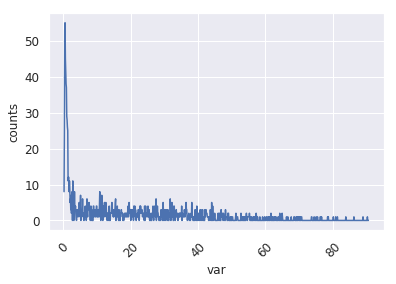

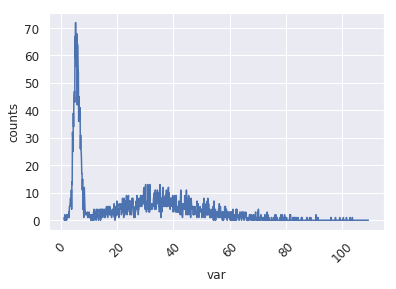

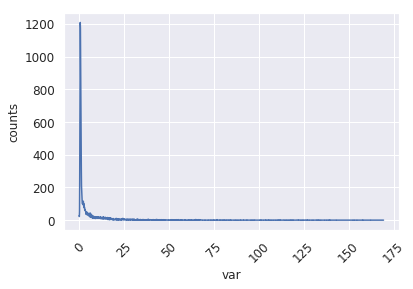

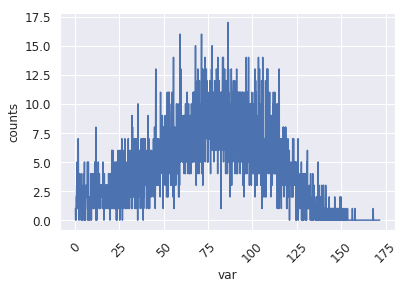

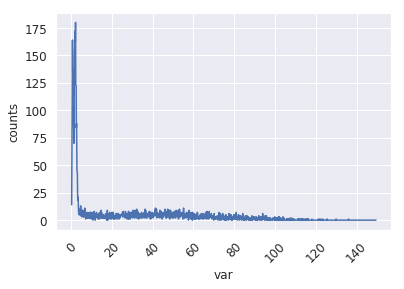

In [118]:
data1.clean(threshold=20)
data2.clean(threshold=20)
data3.clean(threshold=20)
data4.clean(threshold=20)
data5.clean(threshold=20)

In [196]:
big = pd.DataFrame()

big = pd.concat([data1.X, data2.X, data3.X, data4.X, data5.X], axis=0)
big['y'] = pd.concat([data1.y, data2.y, data3.y, data4.y, data5.y], axis=0)
big.dropna(how='any', axis=1, inplace=True)
big.shape

(13212, 130)

In [197]:
big = big[big.y != 'Cichorii']

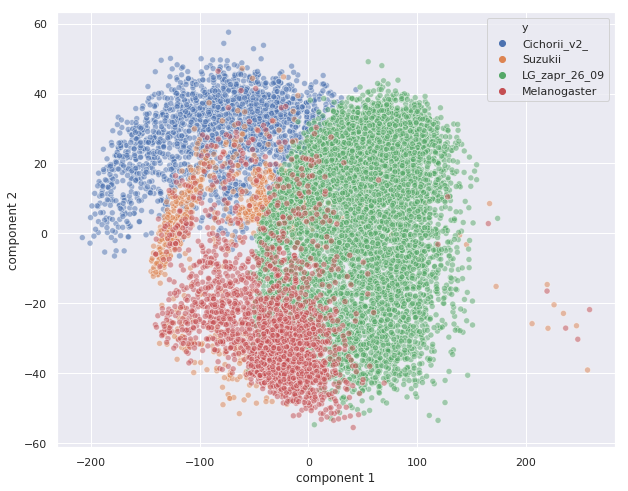

In [185]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X_std = StandardScaler(with_std=False).fit_transform(big.iloc[:,:-1])  # standardization of data

pca = PCA(n_components=2)#, gamma=0.4)

X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_pca[:,0], X_pca[:,1],alpha=0.5, legend='full', hue=big.y) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

### Trying t-SNE

In [198]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [199]:
tSNE = TSNE(n_components=2, 
            learning_rate=100, 
            perplexity=10, 
            early_exaggeration=6, 
            init=init, 
            random_state=random_state)

In [200]:
# X_std = StandardScaler(with_std=True).fit_transform(big.iloc[:,:-1])  # standardization of data

X_final = tSNE.fit_transform(big.iloc[:,:-1])

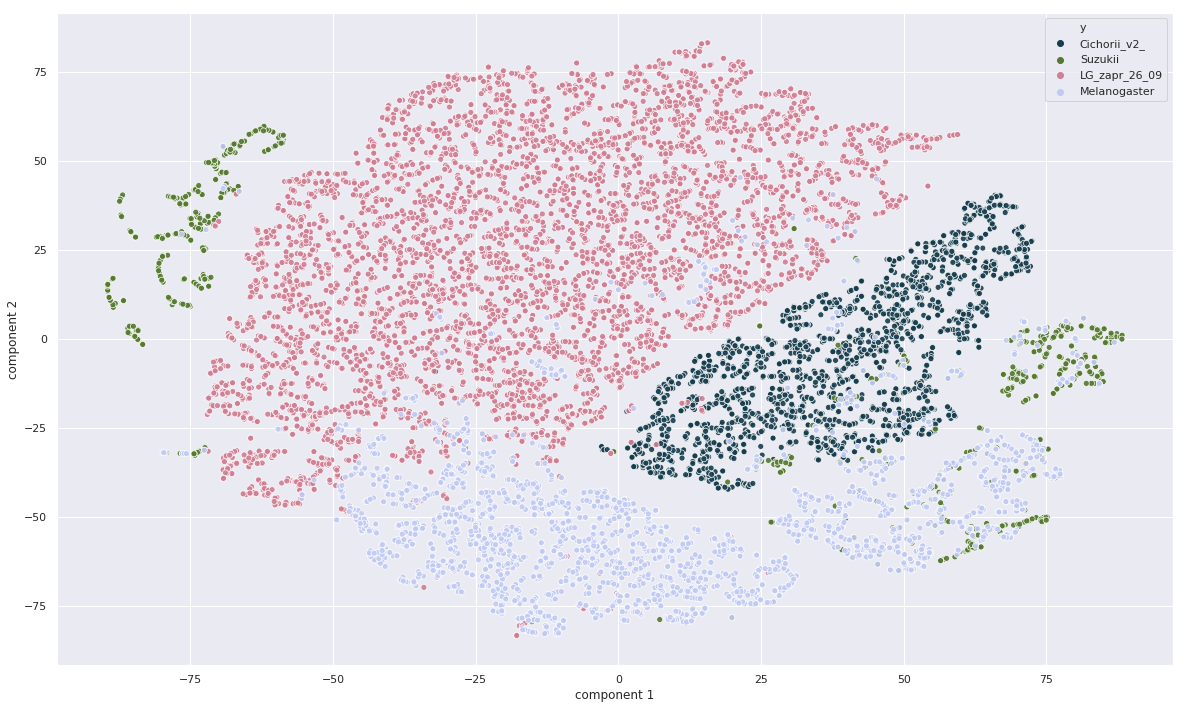

In [201]:
plt.figure(figsize=(20,12))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.9, legend='full', hue=big.y, palette=sns.color_palette("cubehelix", 4)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

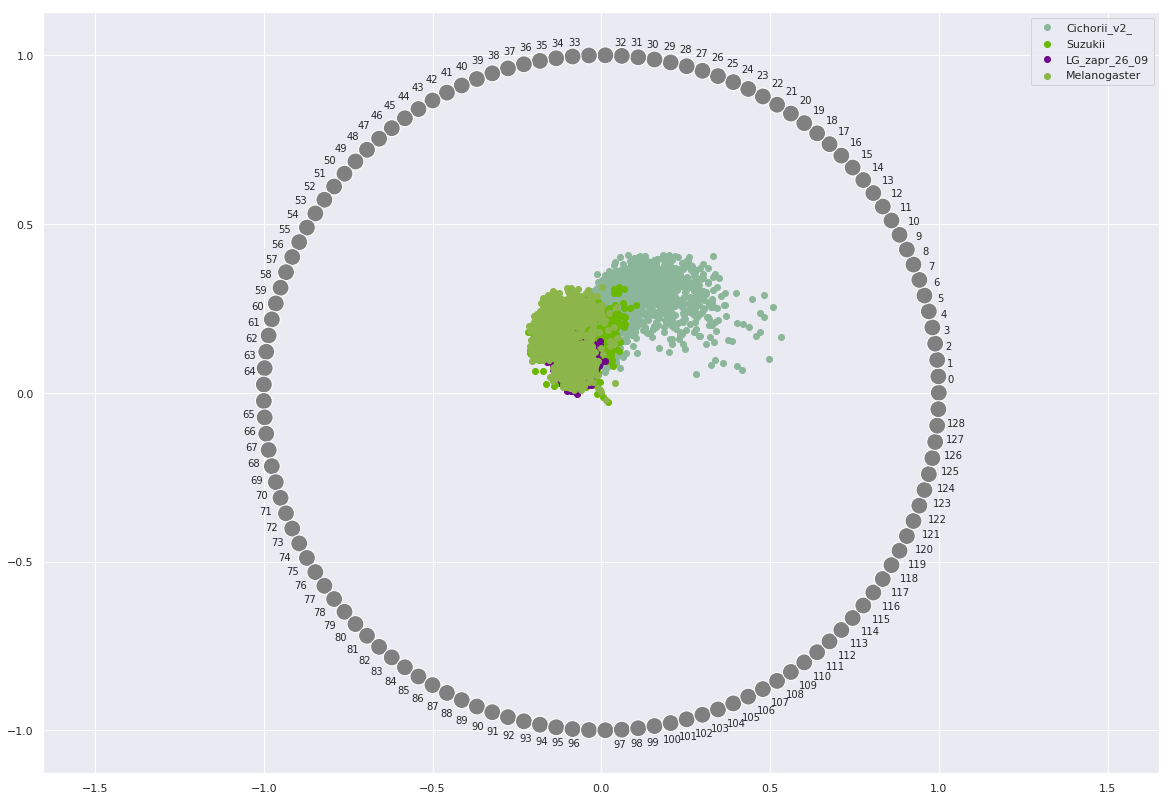

In [205]:
from pandas.plotting import radviz
plt.figure(figsize=(20,14))
radviz(big, 'y')